In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#  Problem Statement

##   You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

##   importing files

In [0]:
import os
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive


In [0]:
ls

sample_data/


In [0]:
os.chdir('/drive/My Drive/Colab Notebooks/Projects-ML/')

In [0]:
ls

 item_categories.csv                       sales_train_v2.csv      test.csv
 items.csv                                 sample_submission.csv
'Project--Predicting Future Sales.ipynb'   shops.csv


In [0]:
train=pd.read_csv('sales_train_v2.csv')
test=pd.read_csv('test.csv')
items=pd.read_csv('items.csv')
item_categories=pd.read_csv('item_categories.csv')
shops=pd.read_csv('shops.csv')
sample_submission=pd.read_csv('sample_submission.csv')

#### Shape of each dataframe

In [0]:
print('shape of train data:',train.shape)
print('shape of test data:',test.shape)
print('shape of shops data:',shops.shape)
print('shape of items data:',items.shape)
print('shape of items_categories data:',item_categories.shape)
print('shape of sample_submission data:',sample_submission.shape)

shape of train data: (2935849, 6)
shape of test data: (214200, 3)
shape of shops data: (60, 2)
shape of items data: (22170, 3)
shape of items_categories data: (84, 2)
shape of sample_submission data: (214200, 2)


###   Columns of each dataframe

In [0]:
train.columns,test.columns,shops.columns,items.columns,item_categories.columns,sample_submission.columns

(Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
        'item_cnt_day'],
       dtype='object'),
 Index(['ID', 'shop_id', 'item_id'], dtype='object'),
 Index(['shop_name', 'shop_id'], dtype='object'),
 Index(['item_name', 'item_id', 'item_category_id'], dtype='object'),
 Index(['item_category_name', 'item_category_id'], dtype='object'),
 Index(['ID', 'item_cnt_month'], dtype='object'))

In [0]:
train.head(),test.head(),shops.head(),items.head(),item_categories.head(),sample_submission.head()

(         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
 0  02.01.2013               0       59    22154      999.00           1.0
 1  03.01.2013               0       25     2552      899.00           1.0
 2  05.01.2013               0       25     2552      899.00          -1.0
 3  06.01.2013               0       25     2554     1709.05           1.0
 4  15.01.2013               0       25     2555     1099.00           1.0,
    ID  shop_id  item_id
 0   0        5     5037
 1   1        5     5320
 2   2        5     5233
 3   3        5     5232
 4   4        5     5268,
                         shop_name  shop_id
 0   !Якутск Орджоникидзе, 56 фран        0
 1   !Якутск ТЦ "Центральный" фран        1
 2                Адыгея ТЦ "Мега"        2
 3  Балашиха ТРК "Октябрь-Киномир"        3
 4        Волжский ТЦ "Волга Молл"        4,
                                            item_name  item_id  item_category_id
 0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         

In [0]:
train.isnull().any(),test.isnull().any(),shops.isnull().any(),items.isnull().any(),item_categories.isnull().any(),sample_submission.isnull().any()

(date              False
 date_block_num    False
 shop_id           False
 item_id           False
 item_price        False
 item_cnt_day      False
 dtype: bool, ID         False
 shop_id    False
 item_id    False
 dtype: bool, shop_name    False
 shop_id      False
 dtype: bool, item_name           False
 item_id             False
 item_category_id    False
 dtype: bool, item_category_name    False
 item_category_id      False
 dtype: bool, ID                False
 item_cnt_month    False
 dtype: bool)

###  Merge all 4 files into one dataframe

In [0]:
df=pd.merge(train,shops,on='shop_id')

In [0]:
df.head(),df.shape

(         date  date_block_num  ...  item_cnt_day               shop_name
 0  02.01.2013               0  ...           1.0  Ярославль ТЦ "Альтаир"
 1  10.01.2013               0  ...           1.0  Ярославль ТЦ "Альтаир"
 2  04.01.2013               0  ...           1.0  Ярославль ТЦ "Альтаир"
 3  19.01.2013               0  ...           2.0  Ярославль ТЦ "Альтаир"
 4  31.01.2013               0  ...           1.0  Ярославль ТЦ "Альтаир"
 
 [5 rows x 7 columns], (2935849, 7))

In [0]:
item_item_cate=pd.merge(items,item_categories,on='item_category_id')

In [0]:
item_item_cate.head(),item_item_cate.shape

(                                           item_name  ...  item_category_name
 0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D  ...          Кино - DVD
 1      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D  ...          Кино - DVD
 2    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D  ...          Кино - DVD
 3        ***КОРОБКА (СТЕКЛО)                       D  ...          Кино - DVD
 4  ***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)         ...  ...          Кино - DVD
 
 [5 rows x 4 columns], (22170, 4))

In [0]:
df=pd.merge(df,item_item_cate,on='item_id')

In [0]:
df.shape
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,02.01.2013,0,25,22154,999.00,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,03.01.2013,0,25,22154,999.00,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,20.01.2013,0,25,22154,999.00,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,23.01.2013,0,25,22154,999.00,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
5,26.01.2013,0,25,22154,999.00,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
6,27.08.2015,31,25,22154,299.00,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
7,02.09.2015,32,25,22154,299.00,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
8,23.01.2013,0,24,22154,999.00,1.0,"Москва ТК ""Буденовский"" (пав.К7)",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
9,10.10.2015,33,24,22154,299.00,1.0,"Москва ТК ""Буденовский"" (пав.К7)",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


##  Checking null values

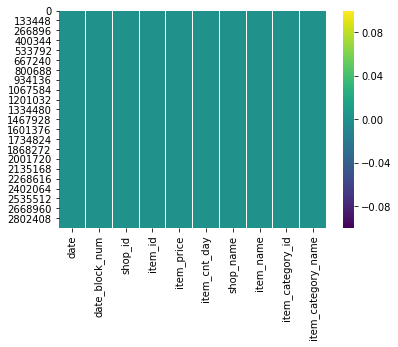

In [0]:
sns.heatmap(df.isnull(),cmap='viridis')

In [0]:
df.isnull().any()

date                  False
date_block_num        False
shop_id               False
item_id               False
item_price            False
item_cnt_day          False
shop_name             False
item_name             False
item_category_id      False
item_category_name    False
dtype: bool

##   Data Analysis

In [0]:
df.dtypes

date                   object
date_block_num          int64
shop_id                 int64
item_id                 int64
item_price            float64
item_cnt_day          float64
shop_name              object
item_name              object
item_category_id        int64
item_category_name     object
dtype: object

##  Date in Object we have to change to datetime format

In [0]:
df['date']=pd.to_datetime(df['date'])

In [0]:
df.dtypes

date                  datetime64[ns]
date_block_num                 int64
shop_id                        int64
item_id                        int64
item_price                   float64
item_cnt_day                 float64
shop_name                     object
item_name                     object
item_category_id               int64
item_category_name            object
dtype: object

###  Splitting date 

In [0]:
import datetime as dt

In [0]:
df1=df.copy()

In [0]:
df1['day'] = df['date'].dt.day
df1['month'] = df['date'].dt.month
df1['year'] = df['date'].dt.year

In [0]:
df1.shape

(2935849, 13)

In [0]:
df1.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,day,month,year
0,2013-02-01,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,1,2,2013
1,2013-02-01,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,1,2,2013
2,2013-03-01,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,1,3,2013
3,2013-01-20,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,20,1,2013
4,2013-01-23,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,23,1,2013


##  Correlation

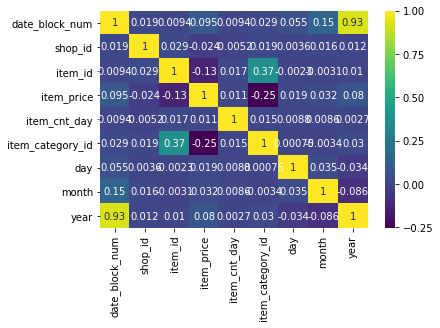

In [0]:
sns.heatmap(df1.corr(),cmap='viridis',annot=True) 

##### ####    cmaps--Perceptually Uniform Sequential: 'viridis', 'plasma', 'inferno', 'magma', 'cividis',,  cmaps--Sequential:'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
  'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn' ,,,cmaps--Sequential(2): binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink','spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia','hot', 'afmhot', 'gist_heat', 'copper',,,cmaps--Diverging:'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu','RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic',,,, cmaps---Qualitative:Pastel1', 'Pastel2', 'Paired', 'Accent','Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c',,,,, cmaps---Miscellaneous:'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',   'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg' 'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'
              
            
         
            
             
                       

###  from above plot we can say that there is no considerale correlation between variables

In [0]:
df1=df1.drop(['shop_name','item_name'],axis=1)

In [0]:
df1.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_category_name,day,month,year
0,2013-02-01,0,59,22154,999.0,1.0,37,Кино - Blu-Ray,1,2,2013
1,2013-02-01,0,25,22154,999.0,1.0,37,Кино - Blu-Ray,1,2,2013
2,2013-03-01,0,25,22154,999.0,1.0,37,Кино - Blu-Ray,1,3,2013
3,2013-01-20,0,25,22154,999.0,1.0,37,Кино - Blu-Ray,20,1,2013
4,2013-01-23,0,25,22154,999.0,1.0,37,Кино - Blu-Ray,23,1,2013


## shop 59 have morethan 2000/- item counts

In [0]:
df1_shop_59=df1[(df1['shop_id']==59) &(df1['item_price']>2000)]

In [0]:
df1_shop_59.shape

(3480, 11)

## high and lowest price of item

In [0]:
df1['item_price'].min(),df1['item_price'].max()

(-1.0, 307980.0)

##  the item which contain max price

In [0]:
df1[df1['item_price']==df1['item_price'].max()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_category_name,day,month,year
2897558,2013-12-13,11,12,6066,307980.0,1.0,75,Программы - Для дома и офиса,13,12,2013


##  The Item which have low Price

In [0]:
df1[df1['item_price']==df1['item_price'].min()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_category_name,day,month,year
212539,2013-05-15,4,32,2973,-1.0,1.0,19,Игры - PS3,15,5,2013


#  Line graphs

## 1) Sales By Monthly

In [0]:
df1[df1['item_cnt_day']<0].shape

(7356, 11)

In [0]:
sales_by_month=df1['item_cnt_day'].groupby(df1['month']).sum()

In [0]:
sales_by_month

month
1     296604.0
2     325550.0
3     328483.0
4     294285.0
5     299124.0
6     291267.0
7     290411.0
8     311088.0
9     300862.0
10    275909.0
11    258635.0
12    375988.0
Name: item_cnt_day, dtype: float64

##  From above we can say that the 12th month contain more sales i.e 3,75,988 for all 3 years

##  For each month of year sales 

In [0]:
x=(df1['year']==2013).groupby(df1['month']).agg({'item_cnt_day':'sum'})
y=(df1['year']==2014).groupby(df1['month']).agg({'item_cnt_day':'sum'})
z=(df1['year']==2015).groupby(df1['month']).agg({'item_cnt_day':'sum'})
x,y,z

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


(       item_cnt_day
 month              
 1          101172.0
 2          111556.0
 3          115446.0
 4           95361.0
 5           93685.0
 6          100825.0
 7          108710.0
 8          109222.0
 9           99521.0
 10          95827.0
 11          91597.0
 12         144640.0,        item_cnt_day
 month              
 1           85738.0
 2           89804.0
 3           87963.0
 4           80143.0
 5           83626.0
 6           83718.0
 7           81601.0
 8           91779.0
 9           77637.0
 10          74951.0
 11          86056.0
 12         132845.0,        item_cnt_day
 month              
 1           64320.0
 2           67390.0
 3           63122.0
 4           55560.0
 5           55545.0
 6           53789.0
 7           56030.0
 8           58771.0
 9           46928.0
 10          51904.0
 11          20815.0
 12          18252.0)

## max sales 1,44,640 in 2013 in 12 th month

## max sales 1,32,845  in 2014 in 12th month i.e dec

##  max sales 67,390  in 2015 in   2nd  month  i.e fed

In [0]:
x.max(),y.max(),z.max()

(item_cnt_day    144640.0
 dtype: float64, item_cnt_day    132845.0
 dtype: float64, item_cnt_day    67390.0
 dtype: float64)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


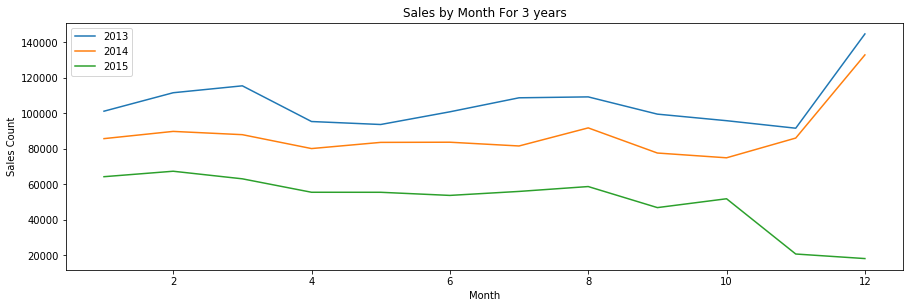

In [0]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot((df1['year']==2013).groupby(df1['month']).agg({'item_cnt_day':'sum'}),label='2013')
plt.plot((df1['year']==2014).groupby(df1['month']).agg({'item_cnt_day':'sum'}),label='2014')
plt.plot((df1['year']==2015).groupby(df1['month']).agg({'item_cnt_day':'sum'}),label='2015')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.title("Sales by Month For 3 years")
plt.legend()
plt.show()


#  2)  Daily Sales  for 3 Years

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


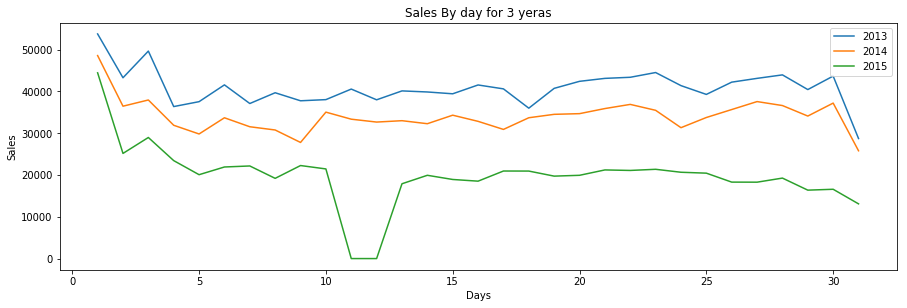

In [0]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot((df1['year']==2013).groupby(df1['day']).agg({'item_cnt_day':'sum'}),label='2013')
plt.plot((df1['year']==2014).groupby(df1['day']).agg({'item_cnt_day':'sum'}),label='2014')
plt.plot((df1['year']==2015).groupby(df1['day']).agg({'item_cnt_day':'sum'}),label='2015')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title("Sales By day for 3 yeras")
plt.legend()
plt.show()

# Histogram

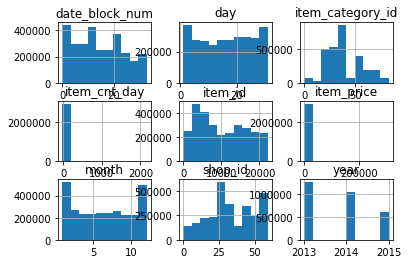

In [0]:
#plt.figure(figsize=(100,100))
df1.hist()
plt.show()

##  Pair plot:   

A pairs plot allows us to see both distribution of single variables and relationships between two variables. 

The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables. 

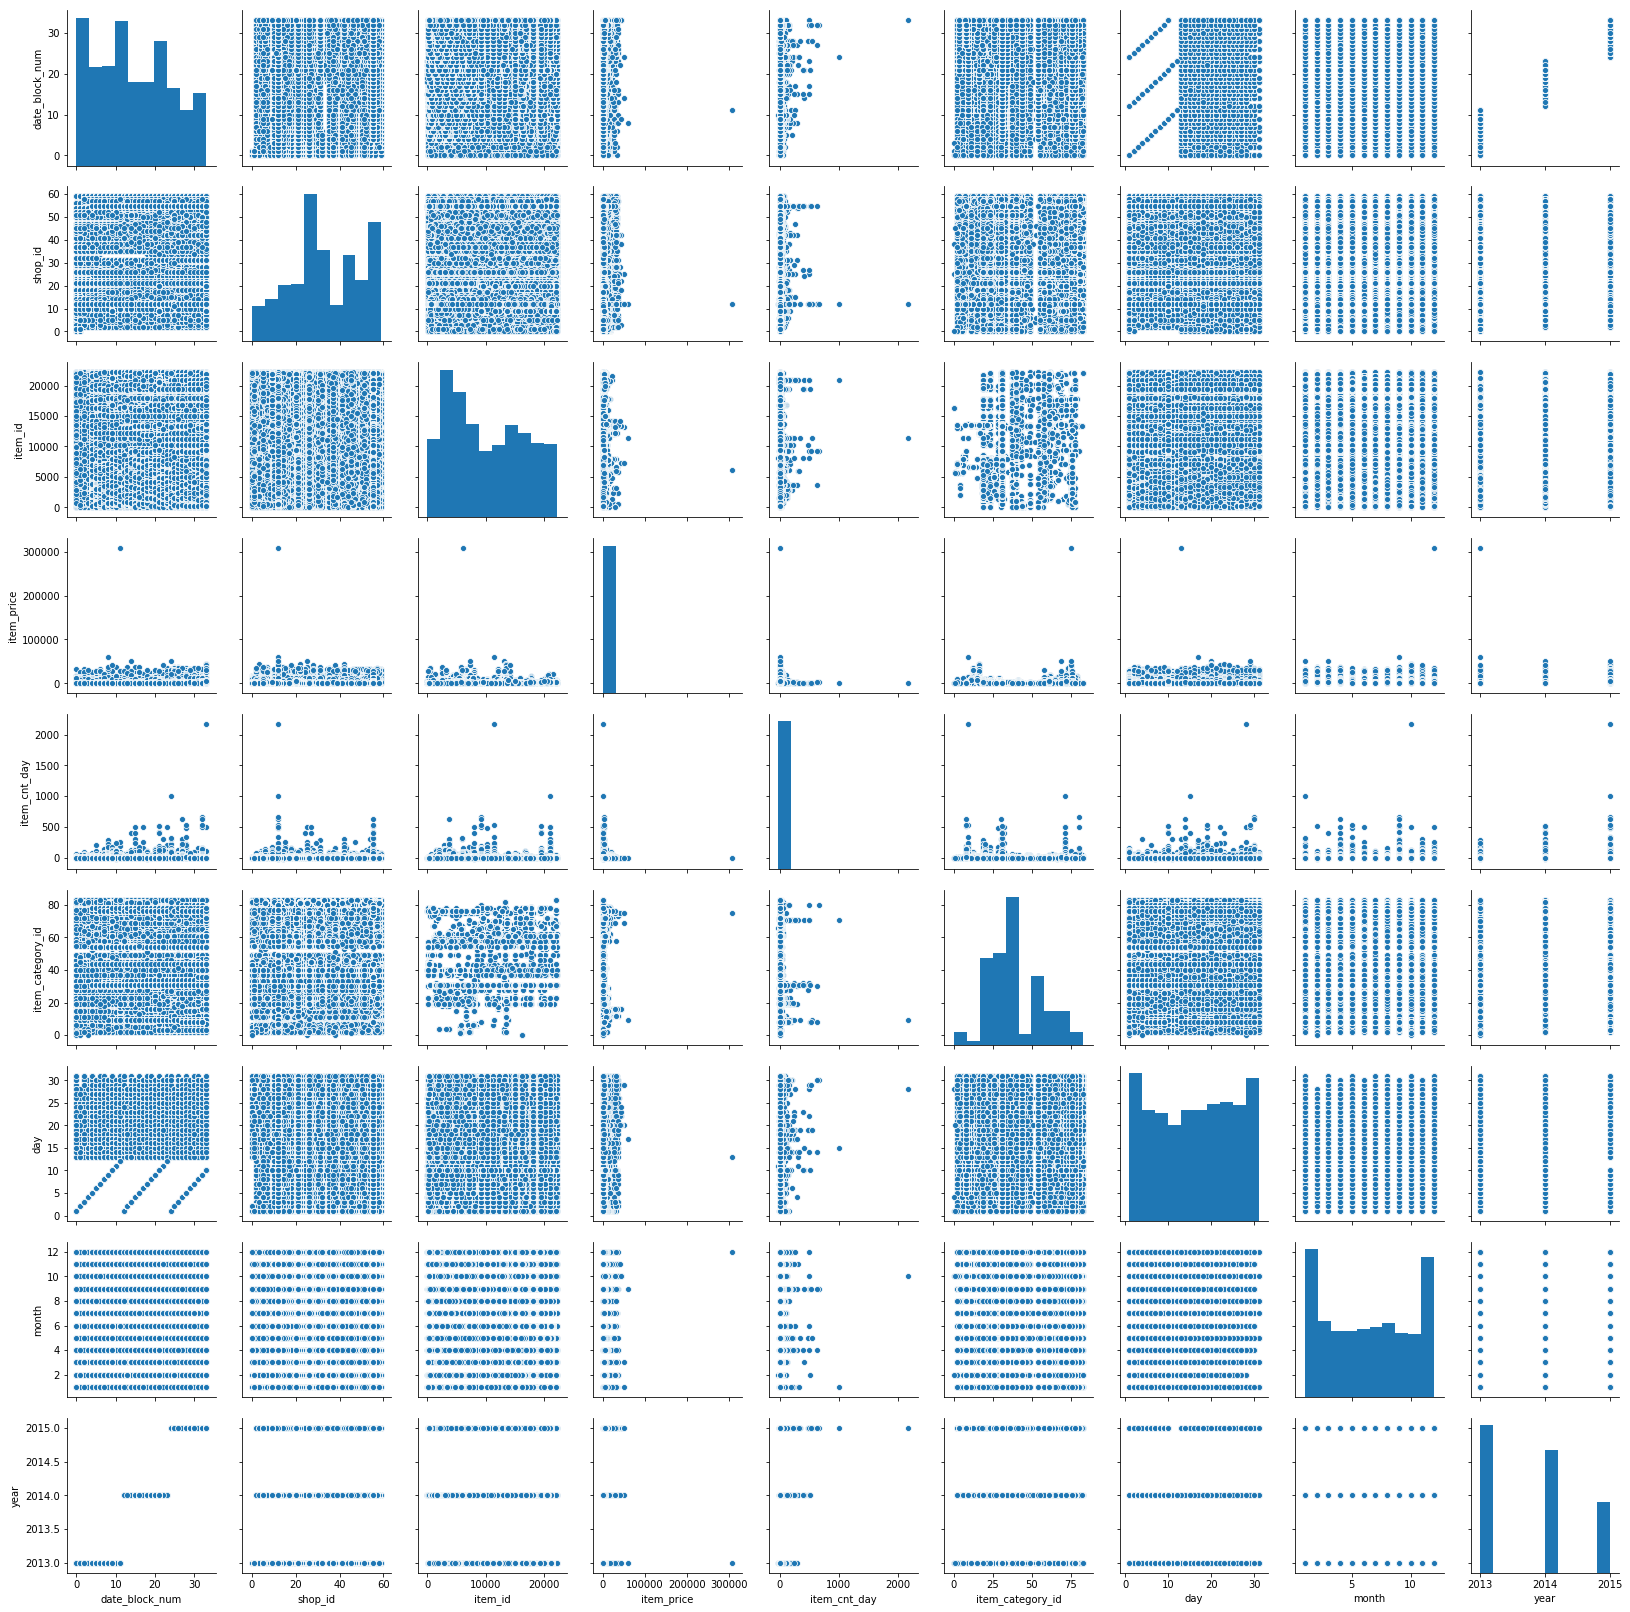

In [0]:
sns.pairplot(df1)

## Pie Charts

##  1)  Pie Chart for  sales by Month of three years

([<matplotlib.patches.Wedge at 0x7f905b4204e0>,
 [Text(1.1610700347585698, 0.3031771336788662, '1'),
  Text(0.8436135922796929, 0.853414381716732, '2'),
  Text(0.2576734453556001, 1.1720087011445668, '3'),
  Text(-0.3773354805254607, 1.1391303415924885, '4'),
  Text(-0.8862280819317185, 0.8090734124884014, '5'),
  Text(-1.1679843788062774, 0.2753406814557458, '6'),
  Text(-1.1567203328719304, -0.31937136928762155, '7'),
  Text(-0.8468615974244477, -0.850191410688036, '8'),
  Text(-0.3043957374457573, -1.1607511512054827, '9'),
  Text(0.28548967057794983, -1.1655452149072956, '10'),
  Text(0.7735432201126032, -0.9174044291466139, '11'),
  Text(1.1376490644121353, -0.38177821603935574, '12')],
 [Text(1.0643141985286892, 0.27791237253896073, '8.13%'),
  Text(0.7733124595897186, 0.782296516573671, '8.92%'),
  Text(0.23620065824263345, 1.0743413093825198, '9.00%'),
  Text(-0.34589085714833895, 1.0442028131264478, '8.07%'),
  Text(-0.8123757417707421, 0.741650628114368, '8.20%'),
  Text(-1.0

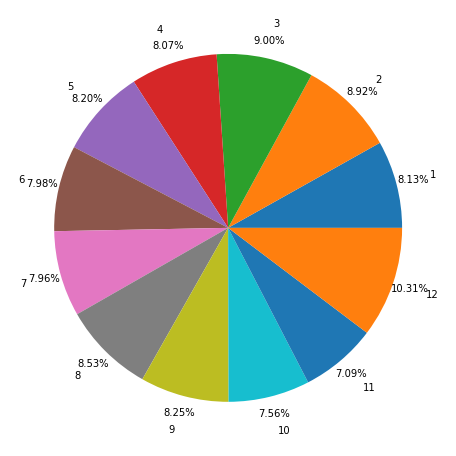

In [0]:
piedata=df1['item_cnt_day'].groupby(df1['month']).sum().reset_index()
plt.figure(figsize=(8,8))
plt.pie(piedata.item_cnt_day,labels=piedata.month,autopct='%1.2f%%',pctdistance=1.1,labeldistance=1.2)

##  from above diagram we can say that 12th month have height sales % i.e 10.31%

##  2) Pie Chart for Sales By  day i.e 1 to 31 of three years

([<matplotlib.patches.Wedge at 0x7f905b368588>,
 [Text(1.1860398404252266, 0.18250889546568183, '1'),
  Text(1.099510440629042, 0.48070447360902513, '2'),
  Text(0.9629210727310727, 0.7160886870286669, '3'),
  Text(0.7906537156114103, 0.9026996743047331, '4'),
  Text(0.6193241151815883, 1.0278315233317874, '5'),
  Text(0.4184042649645344, 1.124694567898097, '6'),
  Text(0.19637299279684542, 1.1838233177717061, '7'),
  Text(-0.01946768082070366, 1.1998420768598939, '8'),
  Text(-0.24478817325097774, 1.1747675302954408, '9'),
  Text(-0.4930846077893704, 1.094014428406318, '10'),
  Text(-0.7016628818662874, 0.9734830251273496, '11'),
  Text(-0.8459328047882518, 0.8511155560692576, '12'),
  Text(-0.9788141101945271, 0.6942066966574839, '13'),
  Text(-1.0964039243862396, 0.4877483312021198, '14'),
  Text(-1.1719167732682247, 0.2580912174650507, '15'),
  Text(-1.1997353338837926, 0.02520175848515769, '16'),
  Text(-1.1818841575612307, -0.20772539109550395, '17'),
  Text(-1.118342367412473, -

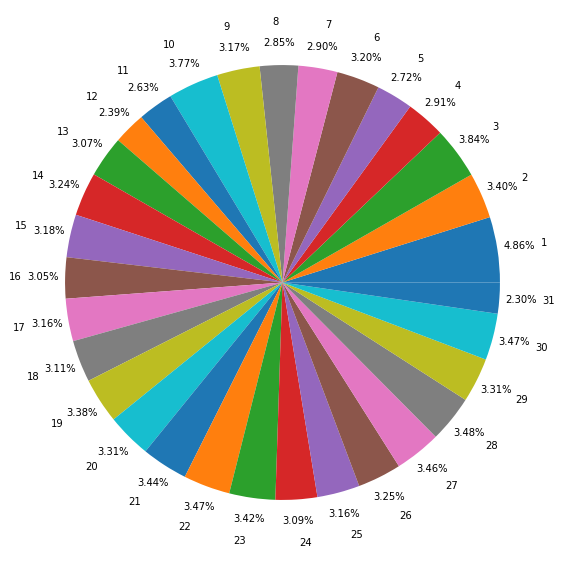

In [0]:
piedata1=df1['item_cnt_day'].groupby(df1['day']).sum().reset_index()
plt.figure(figsize=(10,10))
plt.pie(piedata1.item_cnt_day,labels=piedata1.day,autopct='%1.2f%%',pctdistance=1.1,labeldistance=1.2)

##  from above diagram we can say that max sales done on 10th day of month i.e 3.77%

##  3)  Sales done by yearly i.e 2013,2014,2015

([<matplotlib.patches.Wedge at 0x7f9059a72d68>,
 [Text(0.26781479304092665, 1.1697329766354565, '2013'),
  Text(-0.9275444722982972, -0.7613548790865355, '2014'),
  Text(0.9491599988570343, -0.7342310920750459, '2015')],
 [Text(0.24549689362084945, 1.072255228582502, '42.84%'),
  Text(-0.8502490996067725, -0.6979086391626577, '36.21%'),
  Text(0.8700633322856148, -0.6730451677354589, '20.96%')])

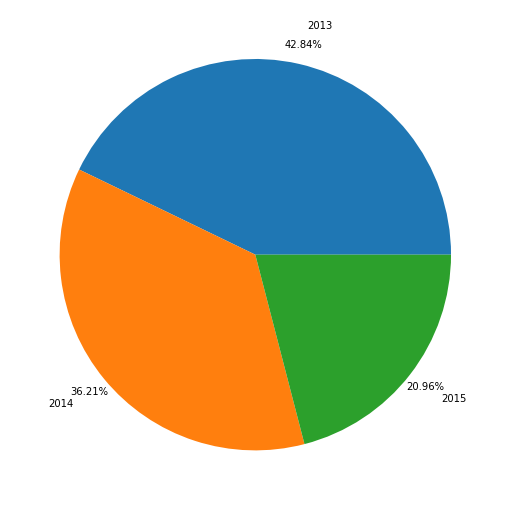

In [0]:
piedata2=df1['item_cnt_day'].groupby(df1['year']).sum().reset_index()
plt.figure(figsize=(9,9))
plt.pie(piedata2.item_cnt_day,labels=piedata2.year,autopct='%1.2f%%',pctdistance=1.1,labeldistance=1.2)

##  From above chart we can say that height sales done in 2013 i.e 42.84%

## From above 3 charts we can say that  heighest sales done on in the year of 2013 in the month of 12th(Dec) on 10th(day)

#  Bar Graphs

Text(0, 0.5, 'sales')

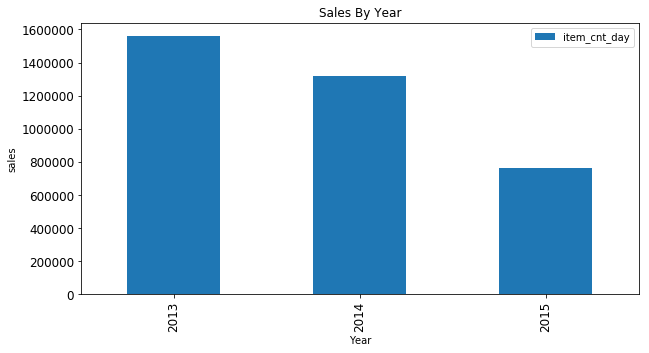

In [0]:
bar=df1['item_cnt_day'].groupby(df1['year']).sum().reset_index()
bar=bar.set_index('year')
bar.plot(kind='bar', title ="Sales By Year",figsize=(10,5),legend=True, fontsize=12)
plt.xlabel('Year')
plt.ylabel('sales')

Text(0, 0.5, 'sales')

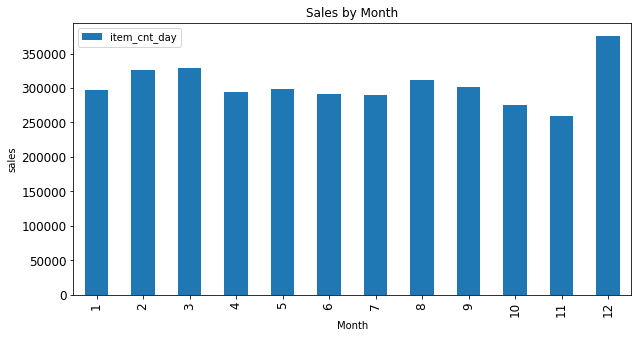

In [0]:
bar1=df1['item_cnt_day'].groupby(df1['month']).sum().reset_index()
bar1=bar1.set_index('month')
bar1.plot(kind='bar', title ="Sales by Month",figsize=(10,5),legend=True, fontsize=12)
plt.xlabel('Month')
plt.ylabel('sales')

In [0]:
ax = plt.gca()  ## gca stands for 'get current axis'

bar.plot(kind='line', title ="Sales By Year",figsize=(10,5),legend=True, fontsize=12,ax=ax)
bar1.plot(kind='line', title ="Sales by Month",figsize=(10,5),legend=True, fontsize=12,ax=ax)

plt.show()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax

# Time Serie Forcasting

In [0]:
df_time=df1[['date','item_cnt_day']]

In [0]:
df_time.shape,df_time.head()

((2935849, 2),         date  item_cnt_day
 0 2013-02-01           1.0
 1 2013-02-01           1.0
 2 2013-03-01           1.0
 3 2013-01-20           1.0
 4 2013-01-23           1.0)

In [0]:
df_time=df_time['item_cnt_day'].groupby(df_time['date']).sum()

In [0]:
df_time.shape,df_time.head()

((1034,), date
 2013-01-01    1951.0
 2013-01-02    3817.0
 2013-01-03    3846.0
 2013-01-04    2574.0
 2013-01-05    4863.0
 Name: item_cnt_day, dtype: float64)

In [0]:
df_time=df_time.reset_index()

In [0]:
df_time.head()

,date,item_cnt_day
0,2013-01-01,1951.0
1,2013-01-02,3817.0
2,2013-01-03,3846.0
3,2013-01-04,2574.0
4,2013-01-05,4863.0


In [0]:
df_time=df_time.set_index('date')

In [0]:
df_time.head()

,item_cnt_day
date,
2013-01-01,1951.0
2013-01-02,3817.0
2013-01-03,3846.0
2013-01-04,2574.0
2013-01-05,4863.0


In [0]:
df_time.max()

item_cnt_day    13343.0
dtype: float64

# Stationarity

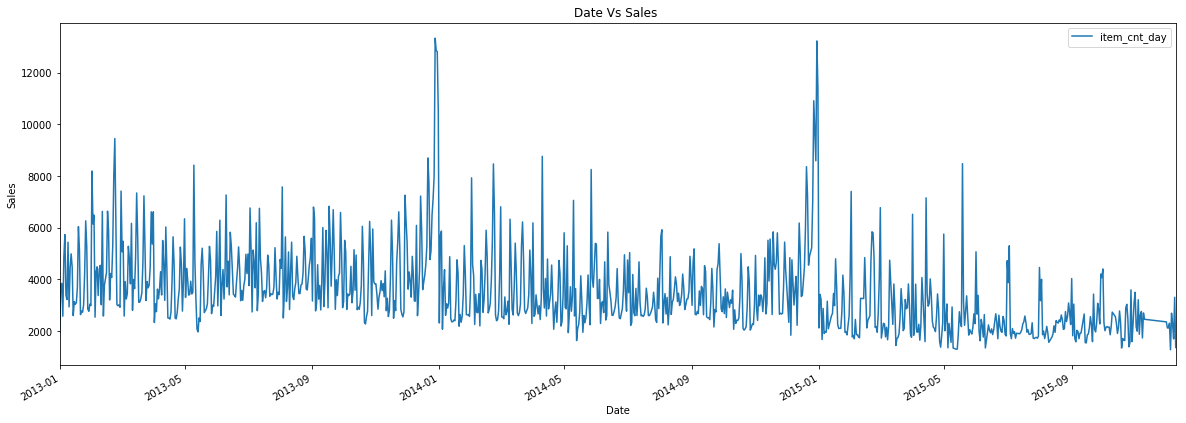

In [0]:
#plt.figure(figsize=(18,10))
#plt.subplot(2,1,1)
df_time.plot(figsize=(20,7))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title("Date Vs Sales ")
plt.show()

##  From above  plot we can say it follows trend that means time series is non stationary...any way to check stationarity   is as  follows

>  Moving mean and moving standard deviation(Rolling Stats)

>   Dickey-fuller Test 

## Checking  for Stationarity

#### moving mean and moving standard deviation(Rolling Stats) :   At any instant ‘t’, we take the mean/std of the last year which in this case is 12 months)

####  Dickey-fuller Test :This is one of the statistical tests for checking stationarity. First we consider the null hypothesis: the time series is non- stationary. The result from the rest will contain the test statistic and critical value for different confidence levels. The idea is to have Test statistics less than critical value, in this case we can reject the null hypothesis and say that this Time series is indeed stationary 

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
#Determing rolling statistics
    
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
#Plot rolling statistics:
    plt.figure(figsize=(20,5))
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
#Perform Dickey-Fuller test:

    print('Results of Dickey-Fuller Test:')
    df_time_test = adfuller(timeseries['item_cnt_day'], autolag='AIC')
    df_time_output = pd.Series(df_time_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    
    for key,value in df_time_test[4].items():
        df_time_output['Critical Value (%s)'%key] = value
    print (df_time_output)

##  pass our time series data into this function:



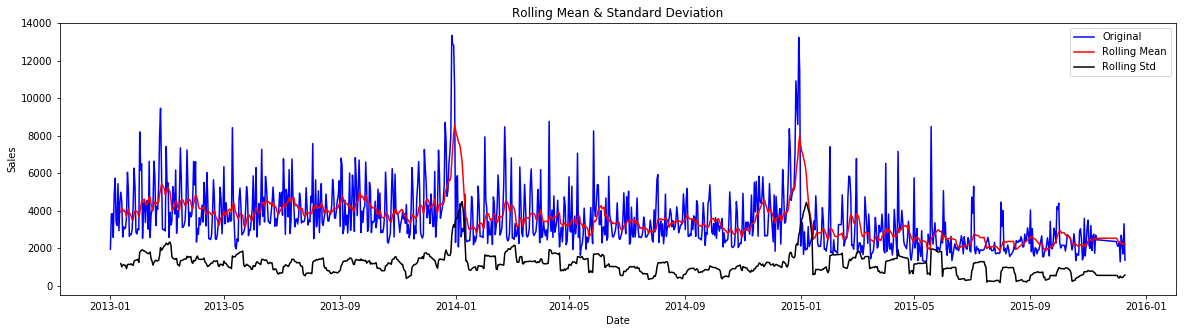

Results of Dickey-Fuller Test:
Test Statistic                   -4.005789
p-value                           0.001381
#Lags Used                       22.000000
Number of Observations Used    1011.000000
Critical Value (1%)              -3.436835
Critical Value (5%)              -2.864403
Critical Value (10%)             -2.568294
dtype: float64


In [0]:
test_stationarity(df_time)

# Making Time series stationary

###  There are two major factors that make a time series non-stationary. 
> Trend

> Seasonality

>>  so we can remove it and make the series stationary.

>>Then we can go ahead and apply statistical forecasting to the stationary series. And finally we can convert the forecasted values into original by applying the trend and seasonality constrains back to those that we previously separated.

##  to remove Trend

>  using transformation(log, sq-rt, cube root etc)

>There is some noise

>>  Smoothing: using rolling/moving average  and Exponentially weighted moving average.

>> •Aggression: by taking the mean for a certain time period (year/month)

Text(0, 0.5, 'Sales')

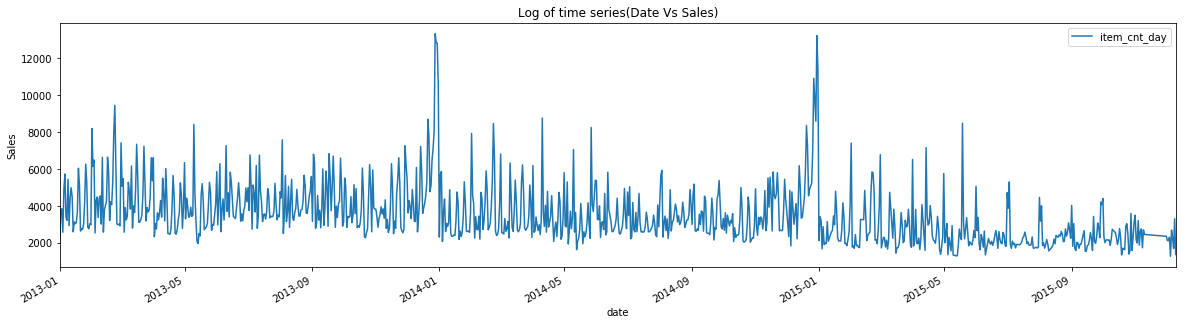

In [0]:
df_time_log=np.log(df_time)
df_time.plot(figsize=(20,5),legend=True,title='Log of time series(Date Vs Sales)')
plt.ylabel('Sales')

No handles with labels found to put in legend.


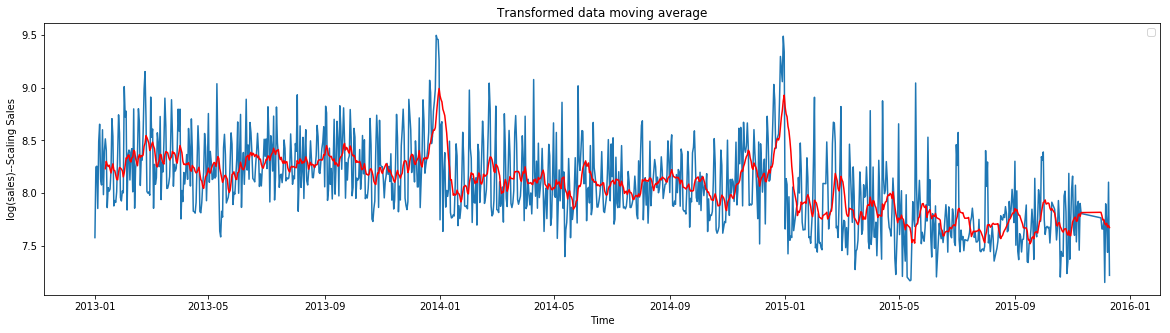

In [0]:
df_time_mvg_avg=df_time_log.rolling(12).mean()
plt.figure(figsize=(20,5))
plt.plot(df_time_log)
plt.plot(df_time_mvg_avg,color='r')
plt.xlabel('Time')
plt.ylabel('log(sales)--Scaling Sales')
plt.title('Transformed data moving average')
plt.legend()

In [0]:
df_time_log_mvg_avg_diff=df_time_log-df_time_mvg_avg
df_time_log_mvg_avg_diff.head(10)

,item_cnt_day
date,
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-05,NaN
2013-01-06,NaN
2013-01-07,NaN
2013-01-08,NaN
2013-01-09,NaN


In [0]:
df_time_log_mvg_avg_diff.dropna(inplace=True)
df_time_log_mvg_avg_diff.head(10)

,item_cnt_day
date,
2013-01-12,0.283200
2013-01-13,0.105491
2013-01-14,-0.407273
2013-01-15,-0.200612
2013-01-16,-0.248000
2013-01-17,-0.189813
2013-01-18,0.020445
2013-01-19,0.467893
2013-01-20,0.261669


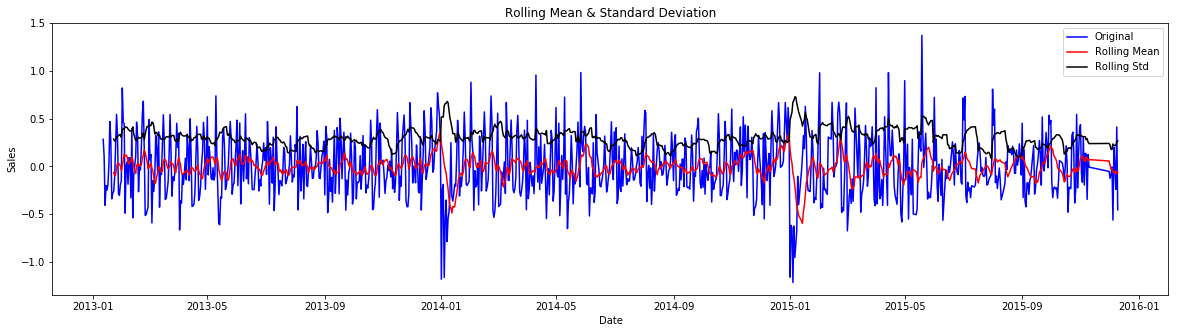

Results of Dickey-Fuller Test:
Test Statistic                -1.028530e+01
p-value                        3.688428e-18
#Lags Used                     2.200000e+01
Number of Observations Used    1.000000e+03
Critical Value (1%)           -3.436906e+00
Critical Value (5%)           -2.864435e+00
Critical Value (10%)          -2.568311e+00
dtype: float64


In [0]:
test_stationarity(df_time_log_mvg_avg_diff)

## To Remove Seasonality along with trend

>> difference

>> decomposation

In [0]:
df_time_diff=df_time_log  -  df_time_log.shift()

In [0]:
df_time_log.head()

,item_cnt_day
date,
2013-01-01,7.576097
2013-01-02,8.247220
2013-01-03,8.254789
2013-01-04,7.853216
2013-01-05,8.489411


In [0]:
df_time_diff.head()

,item_cnt_day
date,
2013-01-01,NaN
2013-01-02,0.671123
2013-01-03,0.007569
2013-01-04,-0.401573
2013-01-05,0.636194


In [0]:
df_time_diff.dropna(inplace=True)
df_time_diff.head()

,item_cnt_day
date,
2013-01-02,0.671123
2013-01-03,0.007569
2013-01-04,-0.401573
2013-01-05,0.636194
2013-01-06,0.164758


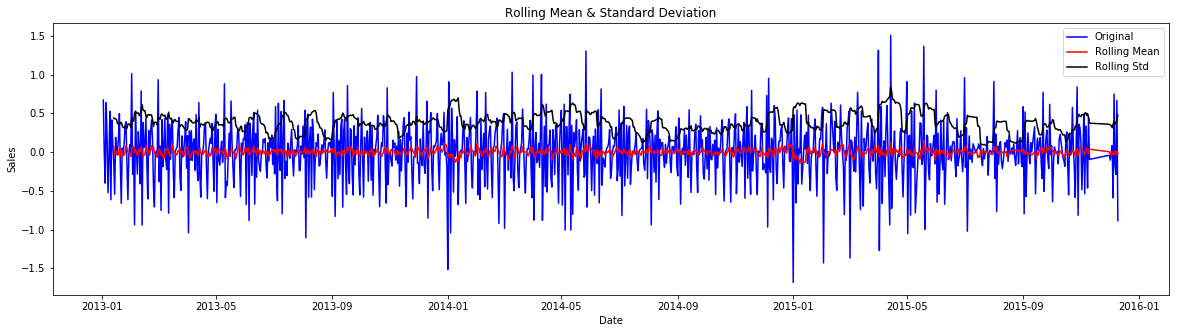

Results of Dickey-Fuller Test:
Test Statistic                -1.152724e+01
p-value                        3.909183e-21
#Lags Used                     1.900000e+01
Number of Observations Used    1.013000e+03
Critical Value (1%)           -3.436822e+00
Critical Value (5%)           -2.864397e+00
Critical Value (10%)          -2.568291e+00
dtype: float64


In [0]:
test_stationarity(df_time_diff)

###  Decomposation

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
df_time_log.head()

,item_cnt_day
date,
2013-01-01,7.576097
2013-01-02,8.247220
2013-01-03,8.254789
2013-01-04,7.853216
2013-01-05,8.489411


In [0]:
decomposation=seasonal_decompose(df_time_log,freq=30)

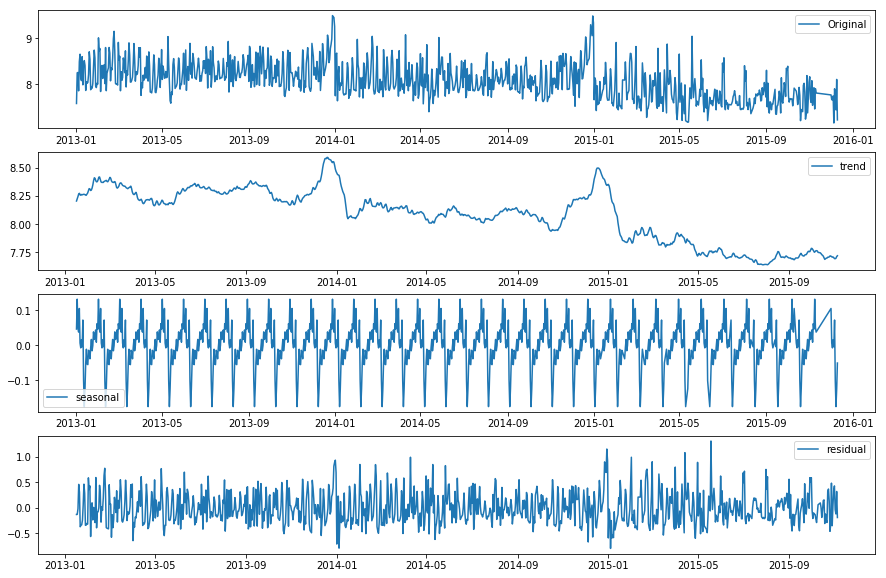

In [0]:
trend=decomposation.trend
seasonal=decomposation.seasonal
residual=decomposation.resid

plt.figure(figsize=(15,10))

plt.subplot(4,1,1)
plt.plot(df_time_log,label='Original')
plt.legend(loc='best')

plt.subplot(4,1,2)
plt.plot(trend,label='trend')
plt.legend(loc='best')

plt.subplot(4,1,3)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(4,1,4)
plt.plot(residual,label='residual')
plt.legend(loc='best')


In [0]:
df_time_decompose=residual
df_time_decompose.dropna(inplace=True)

In [0]:
df_time_decompose.head()

,item_cnt_day
date,
2013-01-16,-0.132715
2013-01-17,-0.130575
2013-01-18,-0.018855
2013-01-19,0.458395
2013-01-20,0.305610


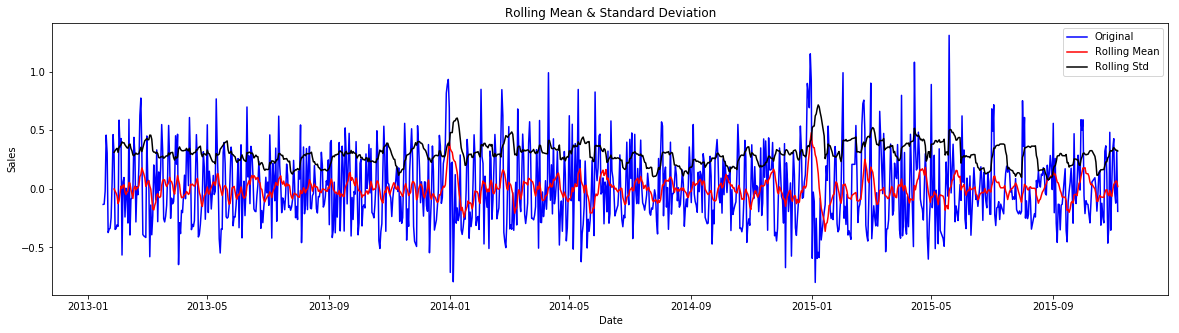

Results of Dickey-Fuller Test:
Test Statistic                -1.075884e+01
p-value                        2.551565e-19
#Lags Used                     2.200000e+01
Number of Observations Used    9.810000e+02
Critical Value (1%)           -3.437033e+00
Critical Value (5%)           -2.864491e+00
Critical Value (10%)          -2.568341e+00
dtype: float64


In [0]:
test_stationarity(df_time_decompose)

#  ARIMA

> p,d,q

> ACF, PACF

## ACF and PACF

In [0]:
from statsmodels.tsa.stattools import acf,pacf

Text(0.5, 1.0, 'Partial Auto correlation Function')

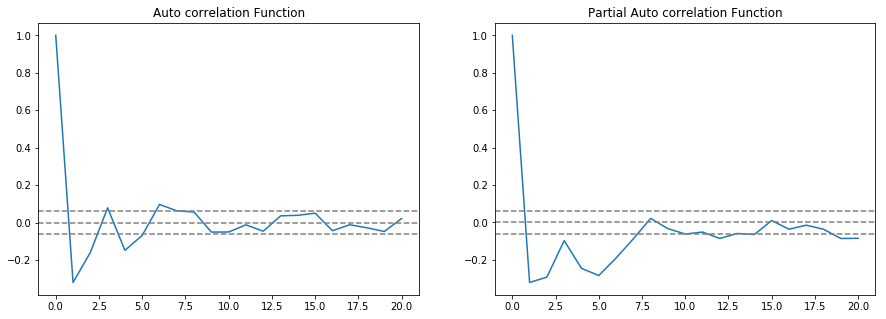

In [0]:
lag_acf=acf(df_time_diff,nlags=20)
lag_pacf=pacf(df_time_diff,nlags=20,method='ols')

plt.figure(figsize=(15,5))

# plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_time_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_time_diff)),linestyle='--',color='gray')
plt.title('Auto correlation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_time_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_time_diff)),linestyle='--',color='gray')
plt.title('Partial Auto correlation Function')

##  ARIMA MODEL

In [0]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting ARIMA Model


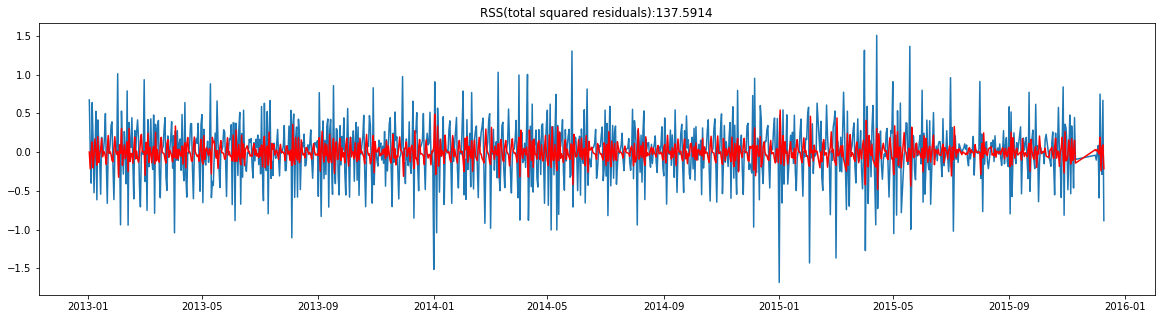

In [0]:
model=ARIMA(df_time_log,order=(1,1,0))
results_ARIMA=model.fit()
plt.figure(figsize=(20,5))
plt.plot(df_time_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS(total squared residuals):%.4f' %sum((results_ARIMA.fittedvalues-df_time_diff['item_cnt_day'])**2))
print('Plotting ARIMA Model')

#  MA Model--p=0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting ARIMA Model


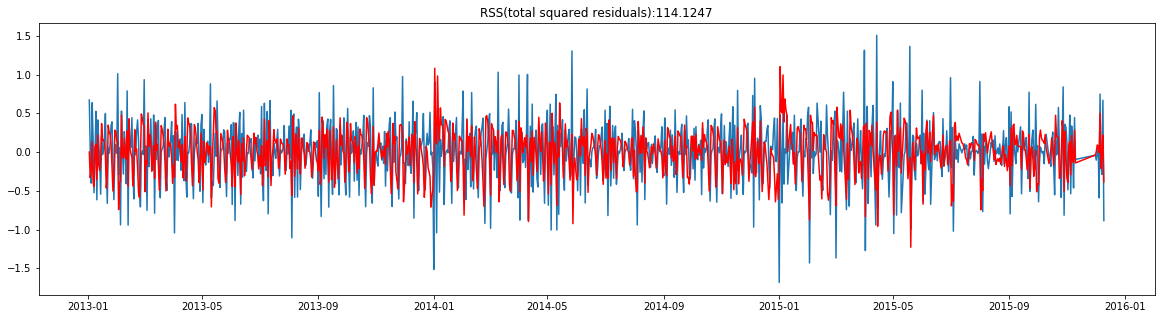

In [0]:
model=ARIMA(df_time_log,order=(0,1,1))
results_ARIMA=model.fit()
plt.figure(figsize=(20,5))
plt.plot(df_time_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS(total squared residuals):%.4f' %sum((results_ARIMA.fittedvalues-df_time_diff['item_cnt_day'])**2))
print('Plotting ARIMA Model')

##  ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting ARIMA Model


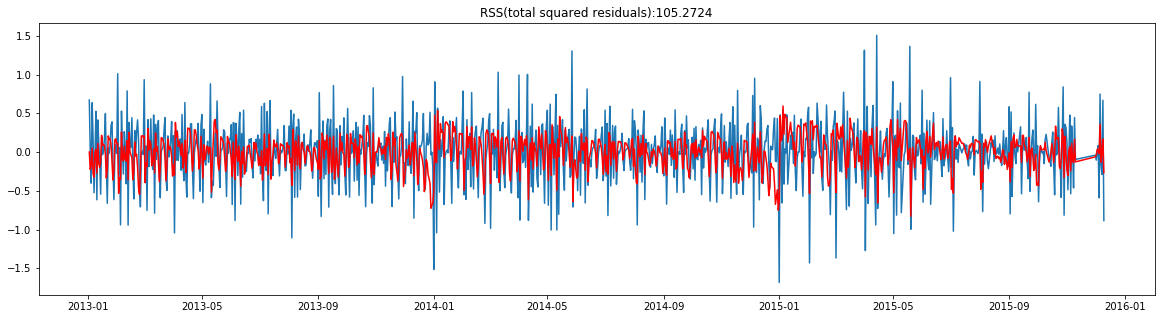

In [0]:
model=ARIMA(df_time_log,order=(1,1,1))
results_ARIMA=model.fit()
plt.figure(figsize=(20,5))
plt.plot(df_time_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS(total squared residuals):%.4f' %sum((results_ARIMA.fittedvalues-df_time_diff['item_cnt_day'])**2))
print('Plotting ARIMA Model')

###   BRINGING THIS BACK TO THE ORIGINAL SCALE

### Prediction and reverse Transformation

In [0]:
prediction_arima_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
prediction_arima_diff.head()

date
2013-01-02   -0.000574
2013-01-03   -0.225644
2013-01-04   -0.172363
2013-01-05    0.050453
2013-01-06   -0.278136
dtype: float64

In [0]:
# convert cumulative sum
prediction_arima_diff_cumsum=prediction_arima_diff.cumsum()
prediction_arima_diff_cumsum.head()

date
2013-01-02   -0.000574
2013-01-03   -0.226218
2013-01-04   -0.398581
2013-01-05   -0.348128
2013-01-06   -0.626264
dtype: float64

In [0]:
prediction_arima_log=pd.Series(df_time_log['item_cnt_day'].iloc[0],index=df_time_log.index)
prediction_arima_log=prediction_arima_log.add(prediction_arima_diff_cumsum,fill_value=0)
prediction_arima_log.head()

date
2013-01-01    7.576097
2013-01-02    7.575523
2013-01-03    7.349879
2013-01-04    7.177516
2013-01-05    7.227970
dtype: float64

In [0]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1034 entries, 2013-01-01 to 2015-12-10
Data columns (total 1 columns):
item_cnt_day    1034 non-null float64
dtypes: float64(1)
memory usage: 16.2 KB


## inverse of log is exp

Text(0.5, 1.0, 'RMSE:184.4194')

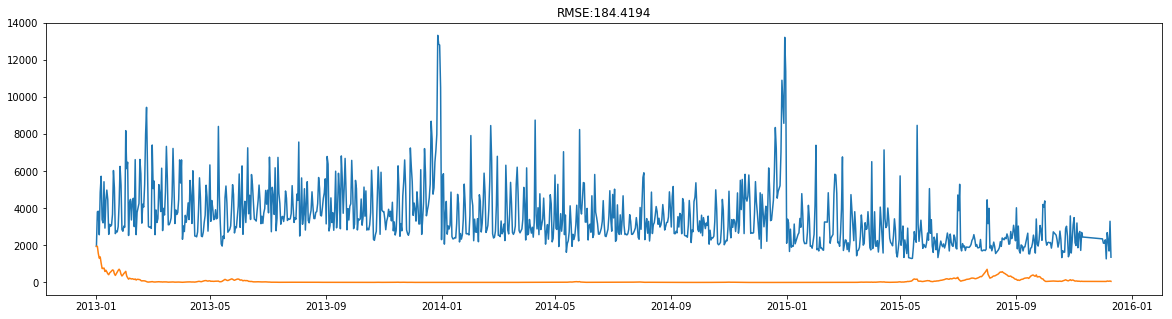

In [0]:
predictions_ARIMA=np.exp(prediction_arima_log)

plt.figure(figsize=(20,5))
plt.plot(df_time)
plt.plot(predictions_ARIMA)
plt.title("RMSE:%.4f"%np.sqrt(sum((predictions_ARIMA)**2)/len(df_time)))